## Clase 9 Regresion

### Tipos de regresion
1. Regresion simple
2. Regresion multiple
3. Regresion logistica

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('reg_data.csv')
df.head()

,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No
2,Male,2200,34,New York,100.8,BMW,Bachelor
3,Male,2100,42,New York,90.0,BMW,Master
4,Female,1500,29,Chicago,67.0,Ford,Master


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model

In [4]:
#pip install statsmodels

In [5]:
#pip install sklearn

In [6]:
df.columns

Index(['Gender', 'Salary', 'Age', 'Place', 'Weight', 'Company',
       'Academic_degree'],
      dtype='object')

# Descripcion de base de datps
## Mis variables de interes
* 'Gender': Variable categorica, explica los generos
* 'Salary': variable numerica, explica cuato gana cada trabajador
* 'Age'
* 'Place'
* 'Weight'
* 'Company'
* 'Academic_degree'

## pregunta de investigacion 1:
### Cual seria el impacto de 'Age' en 'Salary'
Esta pregunta se puede contestar con un modelo de regresion:
Salary = b0 + b1 * Age
* b1 es el impacto de Age en Salary
* b0 es el Salary cuando Age no tiene impacto en Salary

Variable dependiente : 'Salary'
Variable dependiente : 'Age'

In [7]:
df.corr()

,Salary,Age,Weight
Salary,1.000000,0.616834,-0.080883
Age,0.616834,1.000000,-0.212340
Weight,-0.080883,-0.212340,1.000000


#### Observacion
Al observar la tabla de correlacion, podemos ver:

    1. 'Salary' y 'Age' tiene una correlacion positiva (0.616834)
    

In [8]:
# y = b0 + b1*x1 + b2*x2 + ...
y = df['Salary']
x = df['Age']

modelA = sm.OLS.from_formula('Salary~Age', data = df)
resultA = modelA.fit()
resultA.summary()



/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     6.142
Date:                Mon, 29 Nov 2021   Prob (F-statistic):             0.0326
Time:                        14:25:12   Log-Likelihood:                -91.514
No. Observations:                  12   AIC:                             187.0
Df Residuals:                      10   BIC:                             188.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.4458    790.373      0.442      0.668   -1411.614    2110.506
Age           48.0932     19.406      2.478      0.033       4.853      91.333
==============================================================================
Omnibus:                        0.406   Durbin-Watson:                   1.484
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.479
Skew:                           0.321   Prob(JB):                        0.787
Kurtosis:                       2.261   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Observaciones
* R-cuadrado : .380; por lo tanto 38% de Salary explicado por el modelo Salary = b0 + b1*Age
* Df Modelo : 1

* b0 = 349.4458
* b1 = 48.0932

### Modelo final:
Salary = 349.4458 + 48.0932*'Age'

In [9]:
print('Salary of a person with age 33 es : \t', 349.4458 + 48.0932*33)
print('Su residual seria : \t', 1500 - 1936.5214)
df.iloc[:2, :]
      
  


Salary of a person with age 33 es : 	 1936.5214
Su residual seria : 	 -436.5214000000001


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No


In [10]:
RESI = resultA.resid
print(RESI)
RESI.describe()

0    -436.521924
1    -736.521924
2     215.384860
3    -269.360866
4    -244.149060
5    -669.360866
6     245.893407
7       5.427328
8     959.664508
9     338.266270
10    699.198429
11   -107.920161
dtype: float64


count    1.200000e+01
mean    -3.031649e-13
std      5.183902e+02
min     -7.365219e+02
25%     -3.111511e+02
50%     -5.124642e+01
75%      2.689866e+02
max      9.596645e+02
dtype: float64

Text(0.5, 1.0, 'Grafica')

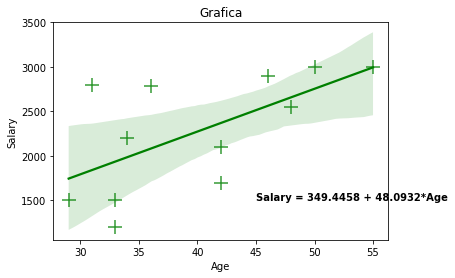

In [11]:
ax = sns.regplot(x= 'Age',
            y= 'Salary',
            data = df,
            color = 'green',
            marker = '+',
            scatter_kws = {'s':200}
           )
ax.text(45, 1500, 
        'Salary = 349.4458 + 48.0932*Age',
        horizontalalignment = 'left',
        size = 'medium',
        color = 'black',
        weight = 'semibold',
       )
ax.set_title('Grafica')

## Conclusiones:
1. por lo tanto, r squared = .380, el modelo no es eficiente
2. los RESI tiene un patron, por lo tanto, no son independientes

## Pregunta 2

### impacto de 'Age' y 'Gender' en 'salary'

modelo de regresion

'Salary '= b0 + b1*Age + b2*gender

V dep = Salary

V indep = Age, Gender

In [12]:
modelB = sm.OLS.from_formula('Salary ~ Age + Gender', data = df)
resultB = modelB.fit()
resultB.summary()


/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     3.101
Date:                Mon, 29 Nov 2021   Prob (F-statistic):             0.0945
Time:                        14:25:13   Log-Likelihood:                -91.242
No. Observations:                  12   AIC:                             188.5
Df Residuals:                       9   BIC:                             189.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        749.8157   1023.148      0.733      0.482   -1564.706    3064.337
Gender[T.Male]   306.7169    474.438      0.646      0.534    -766.535    1379.969
Age               34.2211     29.331      1.167      0.273     -32.130     100.573
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.061
Skew:                           0.691   Prob(JB):                        0.588
Kurtosis:                       2.541   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Df Modelo: 2
    Salary = b0 + b1*Age + b2*Gender
    
* b0 = 749.8157
* b1 = 34.2211
* b2(male) = 306.7169

### Modelo final seria:
Salary = 749.8157 + 34.2211*Age + 306.7169*Gender(male)

### Case study

#### Caso 1: Age = 34, Male = True

In [15]:
print('Salary of a person with age 34 es : \t', 749.8157 + 34.2211*34 + 306.7169*1)
print('Su residual seria : \t', 2200 - 2220.049)
df.iloc[2:3, :]
      

Salary of a person with age 34 es : 	 2220.0499999999997
Su residual seria : 	 -20.048999999999978


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
2,Male,2200,34,New York,100.8,BMW,Bachelor


In [16]:
resultB.resid

0    -379.112228
1    -679.112228
2     -20.050251
3    -393.819095
4    -242.227806
5    -487.102178
6     232.412060
7      61.306533
8     989.329983
9     269.296482
10    798.224456
11   -149.145729
dtype: float64

#### Caso 2: Age = 33, Male = False

In [20]:
print('Salary of a person with age 33 y Female es : \t', 749.8157 + 34.2211*33 + 306.7169*0)
print('Su residual seria : \t', 1500 -  1879.112)
print('Su residual seria : \t', 1200 -  1879.112)
df.iloc[:2, :]

Salary of a person with age 33 y Female es : 	 1879.112
Su residual seria : 	 -379.1120000000001
Su residual seria : 	 -679.1120000000001


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor
1,Female,1200,33,Chicago,82.5,Ford,No


In [21]:
resultB.resid

0    -379.112228
1    -679.112228
2     -20.050251
3    -393.819095
4    -242.227806
5    -487.102178
6     232.412060
7      61.306533
8     989.329983
9     269.296482
10    798.224456
11   -149.145729
dtype: float64

## Pregunta 3

### impacto de 'Age', 'Gender' y 'Academic_degree' en 'salary'

modelo de regresion

'Salary '= b0 + b1*Age + b2*gender + b3*Academic_degree

V dep = Salary

V indep = Age, Gender, Academic_degree

In [23]:
modelC = sm.OLS.from_formula('Salary ~ Age + Gender + Academic_degree', data = df)
resultC = modelC.fit()
resultC.summary()

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1.636
Date:                Mon, 29 Nov 2021   Prob (F-statistic):              0.267
Time:                        14:44:25   Log-Likelihood:                -90.426
No. Observations:                  12   AIC:                             190.9
Df Residuals:                       7   BIC:                             193.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   815.5485   1086.544      0.751      0.477   -1753.721    3384.818
Gender[T.Male]              336.1028    521.798      0.644      0.540    -897.752    1569.958
Academic_degree[T.Master]  -373.1962    404.490     -0.923      0.387   -1329.664     583.271
Academic_degree[T.No]       -43.8495    470.054     -0.093      0.928   -1155.350    1067.651
Age                          36.3765     31.992      1.137      0.293     -39.272     112.025
==============================================================================
Omnibus:                        0.521   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.771   Jarque-Bera (JB):                0.427
Skew:                           0.379   Prob(JB):                        0.808
Kurtosis:                       2.472   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Df Modelo: 4
    Salary = b0 + b1*Age + b2*Gender + b3*Academic_degree
    
    Salary = b0 + b1*Age + b2*Gender(Male + Female) + b3*Academic_degree(Bachelor + Master + No)
    
    
* b0 = 815.5485
* b1 = 34.2211
* b2(male) = 306.7169

### Modelo final seria:
Salary = 815.5485 + 36.3765*Age + 336.1028*Gender(male) - 373.1962*Academic_degree(master) - 43.8495*Academic_degree(No)
                                                                                   
                                                                                   

### CAse study
df modelo: 4 
#### Caso 1 : Age = 48, Male = True, Academic_degree(Master) =True, Academic_degree(No)= False

In [28]:
print('Salary of a person with age 48 y Male es : \t', 815.5485 + 36.3765*48 + 336.1028*1 - 373.1962*1 -43.8495*0) 
#print('Su residual seria : \t', 1500 -  1879.112)
#print('Su residual seria : \t', 1200 -  1879.112)
df.iloc[-1:, :]

Salary of a person with age 48 y Male es : 	 2524.5271000000002


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
11,Male,2550,48,New York,64.0,GM,Master


#### Caso 2 : Age = 36, Male = False, Academic_degree(Master) =False, Academic_degree(No)= True

In [30]:
print('Salary of a person with age 36, Female y tiene No es : \t', 815.5485 + 36.3765*36 + 336.1028*0 - 373.1962*0 -43.8495*1) 
df.iloc[-3:-1, :]

Salary of a person with age 36, Female y tiene No es : 	 2081.253


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
9,Male,2900,46,New York,70.0,GM,Master
10,Female,2780,36,Washington,57.0,BMW,No


In [31]:
resultC.resid

0    -515.972096
1    -772.122563
2    -188.451404
3    -206.267018
4       2.729975
5    -270.164184
6      73.374548
7    -152.357353
8     856.780852
9     448.227087
10    698.748015
11     25.474139
dtype: float64

#### Caso 3 : Age = 33, Male = False, Academic_degree(Master) =False, Academic_degree(No)= False

In [32]:
print('Salary of a person with age 33, Female y tiene Bachelor es : \t', 815.5485 + 36.3765*33 + 336.1028*0 - 373.1962*0 - 43.8495*0) 
df.iloc[:1, :]

Salary of a person with age 33, Female y tiene Bachelor es : 	 2015.973


,Gender,Salary,Age,Place,Weight,Company,Academic_degree
0,Female,1500,33,Chicago,80.0,BMW,Bachelor


In [33]:
resultC.resid

0    -515.972096
1    -772.122563
2    -188.451404
3    -206.267018
4       2.729975
5    -270.164184
6      73.374548
7    -152.357353
8     856.780852
9     448.227087
10    698.748015
11     25.474139
dtype: float64